In [69]:
ReloadProject('deep_learning')

notebook_init.py imported and reloaded
forwarded symbol: A
forwarded symbol: Activation
forwarded symbol: Dense
forwarded symbol: InputLayer
forwarded symbol: Model
forwarded symbol: Sequential
forwarded symbol: T
reloaded: circular_world_env
forwarded symbol: circular_world_env
reloaded: environment_impl
forwarded symbol: environment_impl
reloaded: guided_environments
forwarded symbol: guided_environments
reloaded: gym
forwarded symbol: gym
reloaded: keras
forwarded symbol: keras
reloaded: layers
forwarded symbol: layers
reloaded: logging
forwarded symbol: logging
reloaded: model_builder
forwarded symbol: model_builder
reloaded: models
forwarded symbol: models
reloaded: numpy
forwarded symbol: numpy
reloaded: numpy_util
forwarded symbol: numpy_util
reloaded: optimizers
forwarded symbol: optimizers
reloaded: policy_impl
forwarded symbol: policy_impl
reloaded: q_base
forwarded symbol: q_base
reloaded: qfunc_impl
forwarded symbol: qfunc_impl
reloaded: reporter_impl
forwarded symbol: repo

# Models

## (64,)

In [58]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('MountainCar-v0'))
env.SetGymEnvMaxEpisodeSteps(4000)
qfunc = qfunc_impl.DQN(
    model=qfunc_impl.CreateModel(
        state_shape=env.GetStateShape(),
        action_space_size=env.GetActionSpaceSize(),
        hidden_layer_sizes=(64,)),
    training_batch_size=batch_size,
    discount_factor=0.99,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=100000, experience_sample_batch_size=batch_size)

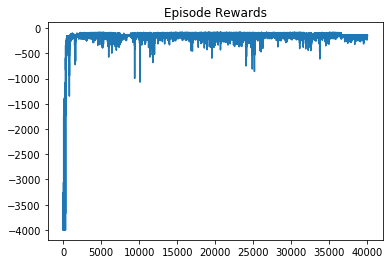

CPU times: user 3h 30min 10s, sys: 32.6 s, total: 3h 30min 43s
Wall time: 3h 32min 11s


In [59]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithDecreasingRandomness(
    initial_epsilon=1.0, final_epsilon=0.1, decay_by_half_after_num_of_episodes=500)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=40000)

In [49]:
trans = runner.SampleFromHistory(size=10)
runner.AddReporter(reporter_impl.ValueTracer(
    trace_states=(t.s for t in trans),
    trace_actions=(0, 1)
))

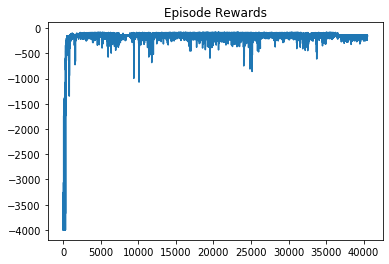

CPU times: user 2min 36s, sys: 1.25 s, total: 2min 37s
Wall time: 2min 40s


In [60]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

In [18]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithRandomness(epsilon=0.1)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=500)

[03:42:51] q_base.py:429 Episode 100/500: avg_reward = -200.00, avg_steps=199.00 (over 100 episodes)
[03:43:30] q_base.py:429 Episode 200/500: avg_reward = -200.00, avg_steps=199.00 (over 100 episodes)
[03:44:10] q_base.py:429 Episode 300/500: avg_reward = -200.00, avg_steps=199.00 (over 100 episodes)
[03:44:45] q_base.py:429 Episode 400/500: avg_reward = -200.00, avg_steps=199.00 (over 100 episodes)
[03:45:21] q_base.py:429 Episode 500/500: avg_reward = -200.00, avg_steps=199.00 (over 100 episodes)
CPU times: user 3min 3s, sys: 1.03 s, total: 3min 4s
Wall time: 3min 7s


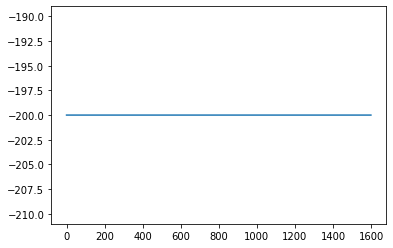

CPU times: user 53.9 s, sys: 1.4 s, total: 55.3 s
Wall time: 56.8 s


In [19]:
%%time
# Test
logging.ENV.debug_verbosity = 4
policy = policy_impl.GreedyPolicy()
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=100)

In [62]:
qfunc.SaveWeights('saved_models/mountaincar_shape_64_rmsprop_gamma_099.weights')

## (20, 20, 20)

In [75]:
batch_size = 64  # used in qfunc and runner.
env = environment_impl.GymEnvironment(gym.make('MountainCar-v0'))
env.SetGymEnvMaxEpisodeSteps(4000)
qfunc = qfunc_impl.DQN(
    model=qfunc_impl.CreateModel(
        state_shape=env.GetStateShape(),
        action_space_size=env.GetActionSpaceSize(),
        hidden_layer_sizes=(20, 20, 20)),
    training_batch_size=batch_size,
    discount_factor=0.99,
)
runner = runner_impl.ExperienceReplayRunner(experience_capacity=100000, experience_sample_batch_size=batch_size)
runner.AddReporter(reporter_impl.ProgressTracer())

[18:14:59] logging.py:44 Episode 100/5000: avg_reward = -3928.07, avg_steps=3927.07 (over 100 episodes)
[18:29:38] logging.py:44 Episode 200/5000: avg_reward = -3838.43, avg_steps=3837.43 (over 100 episodes)
[18:41:50] logging.py:44 Episode 300/5000: avg_reward = -3510.63, avg_steps=3509.63 (over 100 episodes)
[18:55:00] logging.py:44 Episode 400/5000: avg_reward = -3599.79, avg_steps=3598.79 (over 100 episodes)
[19:05:26] logging.py:44 Episode 500/5000: avg_reward = -2865.86, avg_steps=2864.86 (over 100 episodes)
[19:12:17] logging.py:44 Episode 600/5000: avg_reward = -1867.23, avg_steps=1866.23 (over 100 episodes)
[19:13:12] logging.py:44 Episode 700/5000: avg_reward = -253.12, avg_steps=252.12 (over 100 episodes)
[19:14:03] logging.py:44 Episode 800/5000: avg_reward = -244.02, avg_steps=243.02 (over 100 episodes)
[19:14:45] logging.py:44 Episode 900/5000: avg_reward = -184.91, avg_steps=183.91 (over 100 episodes)
[19:15:24] logging.py:44 Episode 1000/5000: avg_reward = -186.71, avg_

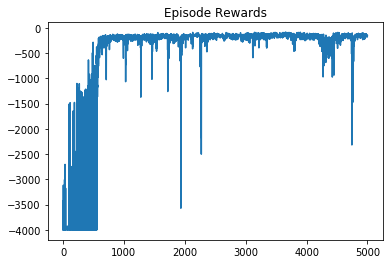

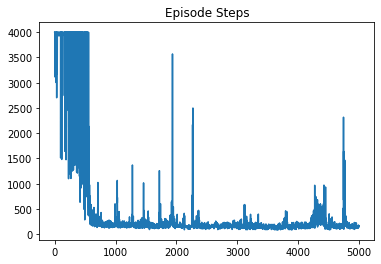

CPU times: user 1h 40min 17s, sys: 1min 13s, total: 1h 41min 30s
Wall time: 1h 44min 24s


In [76]:
%%time
# Train
logging.ENV.debug_verbosity = 3
policy = policy_impl.GreedyPolicyWithDecreasingRandomness(
    initial_epsilon=1.0, final_epsilon=0.1, decay_by_half_after_num_of_episodes=500)
runner.Run(env=env, qfunc=qfunc, policy=policy, num_of_episodes=5000)